In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from ipyleaflet import Map, MarkerCluster, Marker
import plotly.express as px
import plotly.offline as pyo

In [2]:
listings = pd.read_csv('listings.csv', index_col= "id")
listings_details = pd.read_csv("listings_details.csv.gz", index_col= "id", low_memory=False)
calendar = pd.read_csv("calendar.csv.gz", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("reviews_details.csv.gz", parse_dates=['date'] , index_col=['id'])


In [3]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [4]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [5]:
calendar.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [6]:
reviews_details.columns

Index(['listing_id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [7]:
target_columns = ["property_type", "accommodates",  "review_scores_rating",  "host_is_superhost",  "host_response_time", "host_response_rate",'review_scores_location']
df_listings= pd.merge(listings, listings_details[target_columns], on='id', how='left')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7608 entries, 2818 to 906313802809767607
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7608 non-null   object 
 1   host_id                         7608 non-null   int64  
 2   host_name                       7608 non-null   object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   7608 non-null   object 
 5   latitude                        7608 non-null   float64
 6   longitude                       7608 non-null   float64
 7   room_type                       7608 non-null   object 
 8   price                           7608 non-null   int64  
 9   minimum_nights                  7608 non-null   int64  
 10  number_of_reviews               7608 non-null   int64  
 11  last_review                     6898 non-null   object 
 12  reviews_per_month     

In [8]:
df_listings.isnull().sum()

name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
property_type                        0
accommodates                         0
review_scores_rating               710
host_is_superhost                 1213
host_response_time                2259
host_response_rate                2259
review_scores_location             715
dtype: int64

# 1. Data Cleaning :-

In [9]:
df_cleaned = df_listings.drop(columns=['neighbourhood_group'])
df_cleaned['host_response_rate'] = pd.to_numeric(df_listings['host_response_rate'].str.strip('%'))
df_cleaned.head()

name  host_id  host_name  \
id                                                                              
2818    Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...     3159     Daniel   
20168   Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...    59484  Alexander   
213371  Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...  1100324    Hendrik   
155548  Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...   748161      Maria   
27886   Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...    97647       Flip   

                                 neighbourhood  latitude  longitude  \
id                                                                    
2818    Oostelijk Havengebied - Indische Buurt  52.36435    4.94358   
20168                             Centrum-Oost  52.36407    4.89393   
213371                 De Pijp - Rivierenbuurt  52.35150    4.89656   
155548                                Oud-Oost  52.36420    4.92829   
27886                             Centrum-West  52.38761    4.89188   

              room_type  price  minimum_nights  number_of_reviews  ...  \
id                                                                 ...   
2818       Private room     69               3                336  ...   
20168      Private room    106               1                339  ...   
213371  Entire home/apt    270               4                 23  ...   
155548  Entire home/apt    200               3                 21  ...   
27886      Private room    137               3                251  ...   

       availability_365  number_of_reviews_ltm                   license  \
id                                                                         
2818                  7                     40                       NaN   
20168                 0                      0                       NaN   
213371                2                      1  0363 F88F 4B47 6E9B 225B   
155548                0                      0  0363 A562 4D7E 4A91 60DF   
27886                 0                     20                       NaN   

                    property_type  accommodates review_scores_rating  \
id                                                                     
2818        Private room in condo             2                 4.89   
20168   Private room in townhouse             2                 4.44   
213371         Entire rental unit             4                 4.86   
155548         Entire rental unit             3                 4.76   
27886   Private room in houseboat             2                 4.94   

       host_is_superhost  host_response_time  host_response_rate  \
id                                                                 
2818                 NaN      within an hour               100.0   
20168                NaN      within an hour               100.0   
213371                 f                 NaN                 NaN   
155548                 f                 NaN                 NaN   
27886                NaN      within an hour               100.0   

       review_scores_location  
id                             
2818                     4.69  
20168                    4.87  
213371                   4.86  
155548                   4.33  
27886                    4.89  

[5 rows x 23 columns]

# 2. Data exploration :-

# Neighbourhoods

In [10]:
neighbourhood_count =df_cleaned['neighbourhood'].value_counts().sort_values(ascending=True)
neighbourhood_count

neighbourhood
Bijlmer-Oost                                30
Osdorp                                      44
Bijlmer-Centrum                             46
Gaasperdam - Driemond                       49
De Aker - Nieuw Sloten                      62
Buitenveldert - Zuidas                      81
Geuzenveld - Slotermeer                     92
Noord-Oost                                 120
Slotervaart                                149
IJburg - Zeeburgereiland                   164
Noord-West                                 198
Watergraafsmeer                            231
Oostelijk Havengebied - Indische Buurt     286
Oud-Noord                                  346
Bos en Lommer                              382
Oud-Oost                                   451
Zuid                                       510
Westerpark                                 536
Centrum-Oost                               730
De Pijp - Rivierenbuurt                    872
Centrum-West                               969

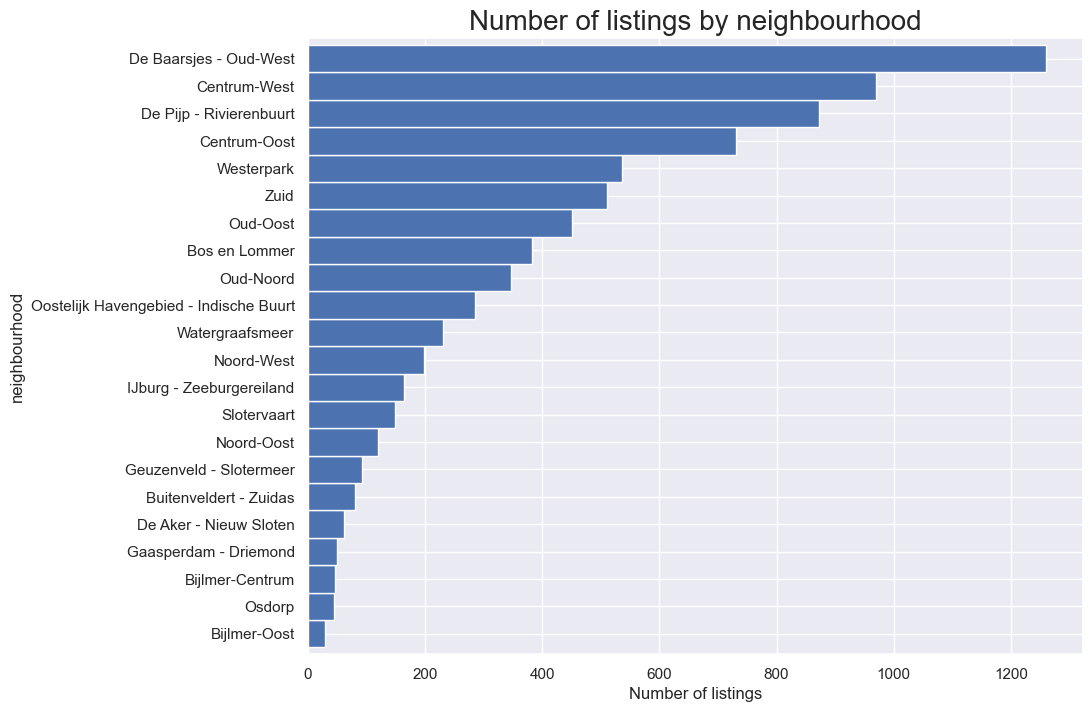

In [11]:
neighbourhood_count.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [12]:
latitude = listings['latitude'].tolist()
longitude = listings['longitude'].tolist()
locations = list(zip(latitude, longitude))

m = Map(center=[52.3680, 4.9036], scroll_wheel_zoom=True)

marker_cluster = MarkerCluster(markers=[Marker(location=location) for location in locations])
m.add_layer(marker_cluster)

m

Map(center=[52.368, 4.9036], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [13]:
# Group data by neighbourhood and compute summary statistics for price
df_cleaned.groupby('neighbourhood')['price'].describe()

count        mean         std   min  \
neighbourhood                                                                  
Bijlmer-Centrum                           46.0  143.043478   79.737613  36.0   
Bijlmer-Oost                              30.0  154.500000   64.907228  42.0   
Bos en Lommer                            382.0  198.811518  111.697642  39.0   
Buitenveldert - Zuidas                    81.0  188.432099   88.895154  50.0   
Centrum-Oost                             730.0  308.900000  484.899904  40.0   
Centrum-West                             969.0  303.006192  442.627446  18.0   
De Aker - Nieuw Sloten                    62.0  241.758065  347.813201  49.0   
De Baarsjes - Oud-West                  1260.0  245.950000  153.438896   0.0   
De Pijp - Rivierenbuurt                  872.0  265.912844  142.951267  50.0   
Gaasperdam - Driemond                     49.0  128.367347   69.315310  45.0   
Geuzenveld - Slotermeer                   92.0  181.869565   88.261875  63.0   
IJburg - Zeeburgereiland                 164.0  241.164634  228.427386  45.0   
Noord-Oost                               120.0  184.425000  114.666316  40.0   
Noord-West                               198.0  192.247475   98.007326  30.0   
Oostelijk Havengebied - Indische Buurt   286.0  201.230769  135.908674  43.0   
Osdorp                                    44.0  185.863636  121.248657  35.0   
Oud-Noord                                346.0  252.130058  272.541922  42.0   
Oud-Oost                                 451.0  231.206208  138.782931  51.0   
Slotervaart                              149.0  190.322148  125.515815  42.0   
Watergraafsmeer                          231.0  234.528139  139.279162  39.0   
Westerpark                               536.0  234.792910  138.436247  45.0   
Zuid                                     510.0  281.211765  211.971729  63.0   

                                           25%    50%     75%      max  
neighbourhood                                                           
Bijlmer-Centrum                          82.75  140.0  185.00    425.0  
Bijlmer-Oost                            116.25  150.0  198.75    325.0  
Bos en Lommer                           125.00  180.0  243.00    889.0  
Buitenveldert - Zuidas                  130.00  178.0  220.00    500.0  
Centrum-Oost                            164.25  233.0  350.00  12000.0  
Centrum-West                            165.00  240.0  350.00  10000.0  
De Aker - Nieuw Sloten                   95.00  128.5  249.75   2450.0  
De Baarsjes - Oud-West                  150.00  212.0  300.00   2500.0  
De Pijp - Rivierenbuurt                 170.00  246.0  325.00   1250.0  
Gaasperdam - Driemond                    79.00  110.0  163.00    350.0  
Geuzenveld - Slotermeer                 113.00  165.0  226.00    491.0  
IJburg - Zeeburgereiland                130.75  180.0  300.00   2575.0  
Noord-Oost                              110.00  156.0  220.00    850.0  
Noord-West                              124.25  173.5  244.75    593.0  
Oostelijk Havengebied - Indische Buurt  124.25  173.0  250.00   1643.0  
Osdorp                                   86.50  154.0  250.75    541.0  
Oud-Noord                               140.75  191.0  280.00   2647.0  
Oud-Oost                                149.00  200.0  275.00   1250.0  
Slotervaart                             100.00  169.0  250.00    900.0  
Watergraafsmeer                         139.00  199.0  291.50    750.0  
Westerpark                              149.00  200.0  295.00   1239.0  
Zuid                                    153.25  229.5  350.00   2000.0

# room_type

In [14]:
room_type_count = df_cleaned['room_type'].value_counts().sort_values(ascending=True)
room_type_count

room_type
Shared room          43
Hotel room           56
Private room       1726
Entire home/apt    5783
Name: count, dtype: int64

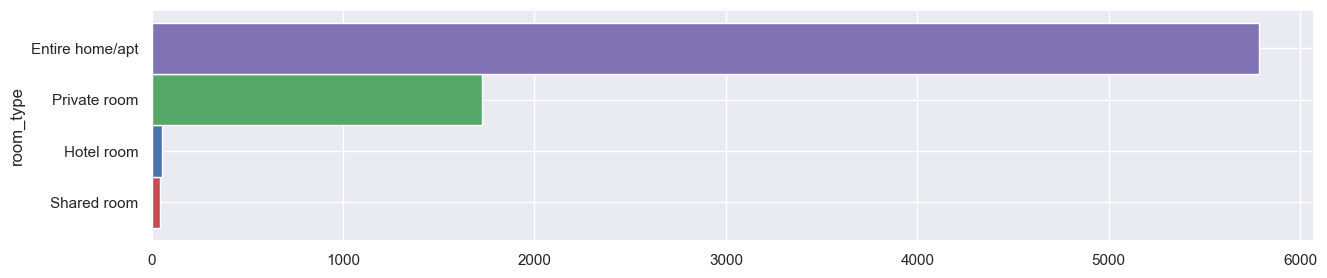

In [15]:
room_type_count.plot.barh(figsize=(15, 3), width=1,color = ['r', 'b', 'g', 'm'])
plt.show()

In [16]:
# Group data by room_type and compute summary statistics for price
df_cleaned.groupby('room_type')['price'].describe()

count        mean         std   min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  5783.0  272.403251  244.698424  18.0  165.0  228.0  320.0   
Hotel room         56.0  240.142857  173.685654   0.0  160.0  216.5  282.5   
Private room     1726.0  182.154693  310.524159  30.0  101.0  146.0  209.0   
Shared room        43.0  161.674419  186.889797  50.0   79.0   91.0  155.5   

                     max  
room_type                 
Entire home/apt  10000.0  
Hotel room        1089.0  
Private room     12000.0  
Shared room       1150.0

# Top Hosts by Maximum Room Type Counts

In [17]:
room_types = ['Shared room', 'Hotel room', 'Private room', 'Entire home/apt']
results = []

for room_type in room_types:
    filtered_data = df_cleaned[df_cleaned['room_type'] == room_type]
    max_count_info = filtered_data.groupby(['host_id', 'host_name']).size().reset_index(name='max_count').sort_values(by='max_count', ascending=False).iloc[0]
    results.append({
        'room_type': room_type,
        'host_id': max_count_info['host_id'],
        'host_name': max_count_info['host_name'],
        'max_count': max_count_info['max_count']
    })

result_df = pd.DataFrame(results).sort_values(by="max_count",ascending=False).reset_index(drop=True)
result_df


room_type    host_id        host_name  max_count
0     Private room   14574533  Hotel Not Hotel         21
1  Entire home/apt   46691672       Eva & Kobe         16
2      Shared room  245267147       ClinkNOORD          8
3       Hotel room  503491020          Rosalie          6

# property_type

In [18]:
property_type_count = df_cleaned['property_type'].value_counts().sort_values(ascending=True)
property_type_count

property_type
Private room in vacation home            1
Private room in bungalow                 1
Tower                                    1
Shared room in home                      1
Yurt                                     1
Cave                                     1
Barn                                     1
Shared room in bed and breakfast         1
Shared room in boat                      1
Entire chalet                            2
Casa particular                          2
Private room in cabin                    2
Private room in nature lodge             2
Shared room in condo                     3
Camper/RV                                3
Entire cottage                           3
Private room in tiny home                3
Tent                                     3
Shared room in houseboat                 4
Private room in farm stay                5
Private room in earthen home             5
Shared room in rental unit               5
Room in serviced apartment              

In [19]:
prop = df_cleaned.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])
prop

room_type                          Entire home/apt  Hotel room  Private room  \
property_type                                                                  
Room in boutique hotel                         NaN        12.0          90.0   
Room in hotel                                  NaN         2.0         116.0   
Private room in home                           NaN         NaN         142.0   
Houseboat                                    143.0         NaN           NaN   
Private room in condo                          NaN         NaN         164.0   
Entire loft                                  194.0         NaN           NaN   
Entire townhouse                             228.0         NaN           NaN   
Private room in bed and breakfast              NaN         NaN         285.0   
Private room in rental unit                    NaN         NaN         478.0   
Entire home                                  561.0         NaN           NaN   
Entire condo                                1430.0         NaN           NaN   
Entire rental unit                          2901.0         NaN           NaN   

room_type                          Shared room  
property_type                                   
Room in boutique hotel                     NaN  
Room in hotel                              NaN  
Private room in home                       NaN  
Houseboat                                  NaN  
Private room in condo                      NaN  
Entire loft                                NaN  
Entire townhouse                           NaN  
Private room in bed and breakfast          NaN  
Private room in rental unit                NaN  
Entire home                                NaN  
Entire condo                               NaN  
Entire rental unit                         NaN

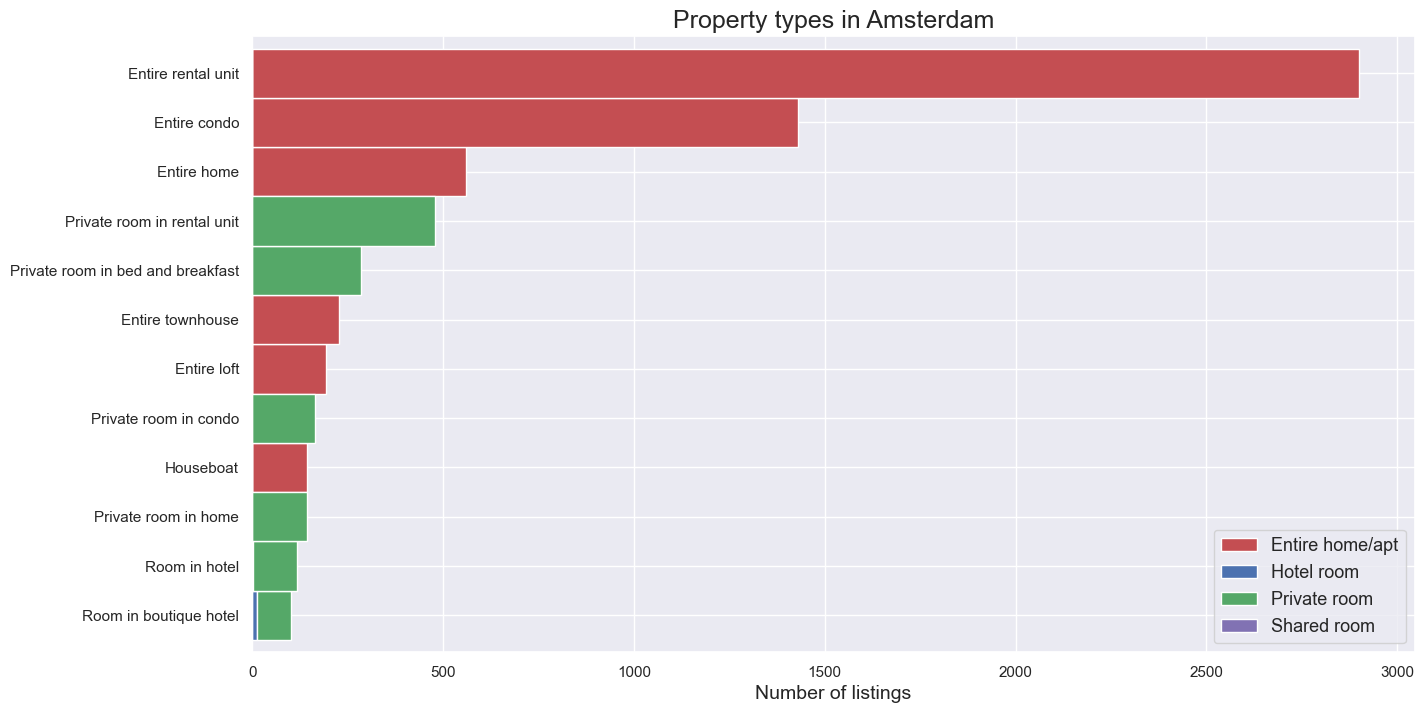

In [20]:
prop.plot(kind='barh',stacked=True, color = ["r","b","g",'m'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

In [21]:
# Group data by property_type and compute summary statistics for price
df_cleaned.groupby('property_type')['price'].describe().sort_values(by='max')

count        mean          std    min  \
property_type                                                                
Shared room in home                    1.0   50.000000          NaN   50.0   
Barn                                   1.0   85.000000          NaN   85.0   
Yurt                                   1.0   90.000000          NaN   90.0   
Camper/RV                              3.0   99.666667     0.577350   99.0   
Private room in bungalow               1.0  107.000000          NaN  107.0   
Private room in vacation home          1.0  120.000000          NaN  120.0   
Private room in farm stay              5.0  102.800000    23.647410   87.0   
Entire chalet                          2.0  130.000000    28.284271  110.0   
Private room in cabin                  2.0  144.500000    20.506097  130.0   
Private room in tiny home              3.0  136.666667    57.951129   70.0   
Tent                                   3.0  184.000000     0.000000  184.0   
Tiny home                              7.0  148.714286    43.111152   95.0   
Shared room in condo                   3.0  208.333333    33.827996  170.0   
Private room in earthen home           5.0  202.200000    29.777508  172.0   
Entire cabin                           7.0  147.714286    77.271630   58.0   
Casa particular                        2.0  216.000000    59.396970  174.0   
Shared room in bed and breakfast       1.0  296.000000          NaN  296.0   
Private room in villa                 13.0  139.153846    58.196286   87.0   
Room in hostel                        11.0  161.727273    87.439226   67.0   
Private room                           8.0  155.000000    72.865826   90.0   
Private room in casa particular       15.0  140.466667    69.545326   45.0   
Private room in loft                  39.0  153.743590    63.801798   55.0   
Private room in townhouse             85.0  122.070588    58.975134   30.0   
Shared room in houseboat               4.0  297.000000    81.906451  204.0   
Cave                                   1.0  400.000000          NaN  400.0   
Private room in nature lodge           2.0  283.500000   180.312229  156.0   
Shared room in rental unit             5.0  159.600000   143.973261   75.0   
Private room in hostel                17.0  283.882353    78.940549  203.0   
Tower                                  1.0  469.000000          NaN  469.0   
Entire guesthouse                     20.0  189.000000    90.287261   82.0   
Private room in guest suite           83.0  162.072289    81.006140   65.0   
Shared room in boat                    1.0  500.000000          NaN  500.0   
Private room in condo                164.0  142.841463    74.101484   40.0   
Room in bed and breakfast             25.0  228.560000    95.002667   94.0   
Private room in houseboat             93.0  184.741935    84.313713   55.0   
Private room in rental unit          478.0  135.656904    72.968299   35.0   
Room in aparthotel                    20.0  353.400000   160.491482  186.0   
Entire cottage                         3.0  377.666667   241.913897  218.0   
Entire guest suite                    26.0  178.269231   110.294717   90.0   
Room in serviced apartment             6.0  315.166667   290.408276  160.0   
Private room in home                 142.0  149.021127   111.503743   50.0   
Room in hotel                        118.0  262.118644   135.100986    0.0   
Private room in bed and breakfast    285.0  197.329825   118.691086   31.0   
Private room in guesthouse            13.0  222.538462   260.700216   71.0   
Room in boutique hotel               102.0  306.745098   142.634594   75.0   
Shared room in hostel                 28.0  124.821429   201.735811   56.0   
Entire loft                          194.0  308.536082   198.938143   70.0   
Entire place                          12.0  423.250000   273.891858  157.0   
Entire serviced apartment             84.0  388.583333   182.855411  125.0   
Entire townhouse                     228.0  290.881579   22

# Accommodates (number of people)

In [22]:
accommodates_count = df_cleaned['accommodates'].value_counts().sort_values(ascending=False)
accommodates_count

accommodates
2     4051
4     2447
3      581
1      181
6      137
5      131
7       24
8       22
16      16
12      10
14       3
10       3
9        2
Name: count, dtype: int64

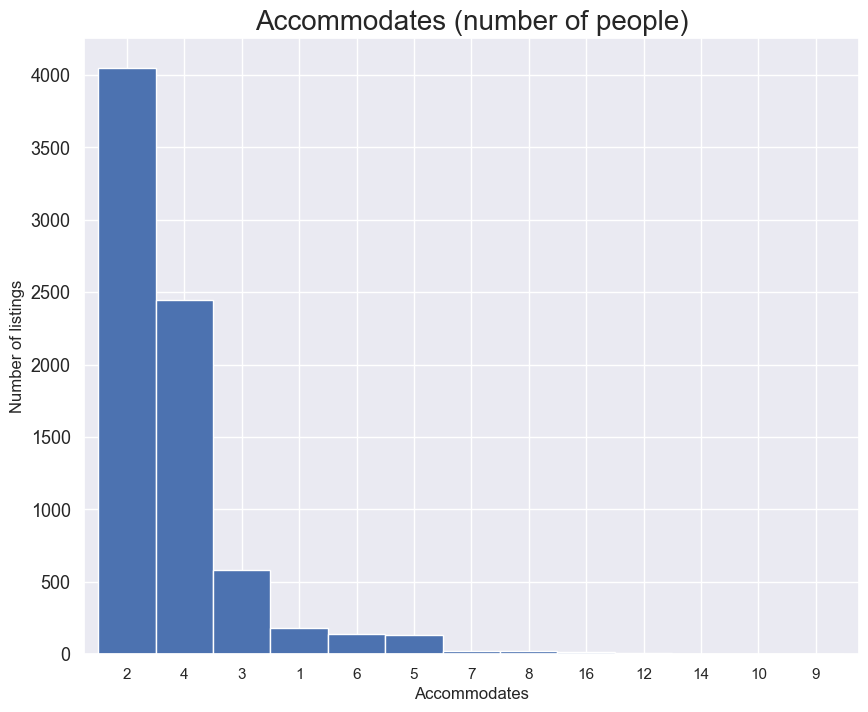

In [23]:
accommodates_count.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

# Average daily price per neighbourhood

In [24]:
avg_accommodates = df_cleaned[df_cleaned['accommodates']==2]
avg_accommodates = avg_accommodates.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
avg_accommodates

neighbourhood
Bijlmer-Centrum                            94.666667
Gaasperdam - Driemond                     103.384615
Osdorp                                    111.090909
Bijlmer-Oost                              117.750000
Noord-Oost                                121.862069
IJburg - Zeeburgereiland                  127.897959
Geuzenveld - Slotermeer                   128.812500
Noord-West                                134.564516
Slotervaart                               151.129870
Watergraafsmeer                           156.533333
De Aker - Nieuw Sloten                    156.903226
Buitenveldert - Zuidas                    157.431818
Bos en Lommer                             159.140000
Oostelijk Havengebied - Indische Buurt    161.070588
Oud-Oost                                  185.312000
Westerpark                                189.968300
Oud-Noord                                 190.838235
De Baarsjes - Oud-West                    201.362398
Zuid                            

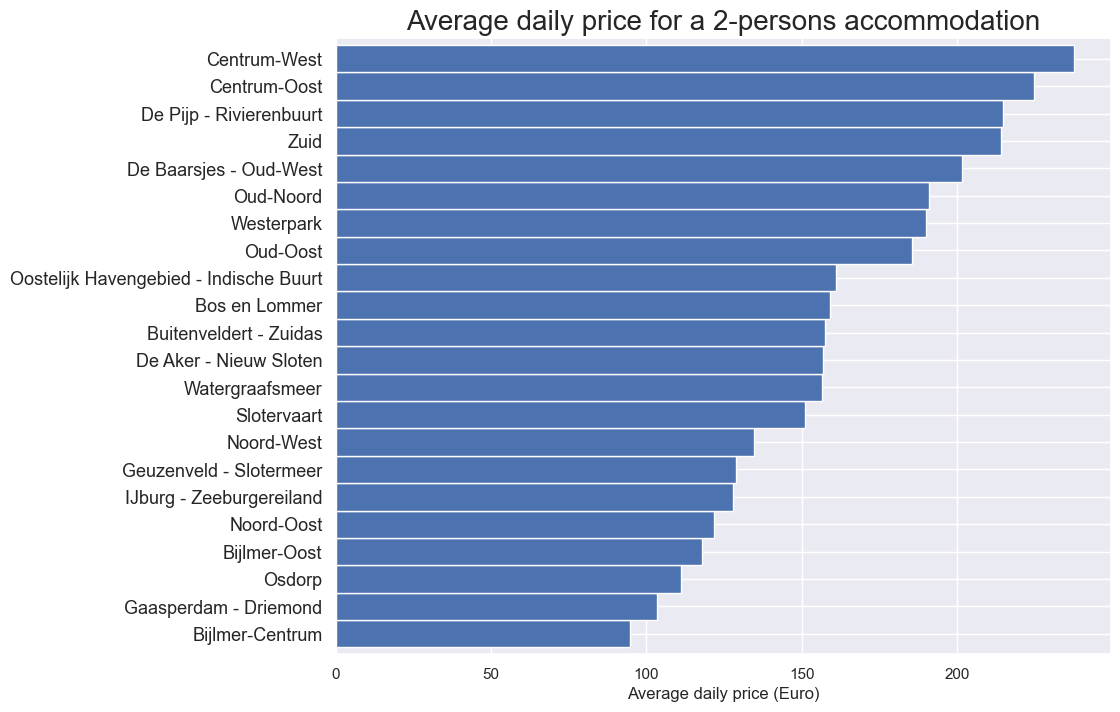

In [25]:
avg_accommodates.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

# Average review per neighbourhood (at least 10 reviews)

In [26]:
avg_reviews = df_cleaned[df_cleaned['number_of_reviews']>=10]
avg_reviews = avg_reviews.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
avg_reviews

neighbourhood
Gaasperdam - Driemond                     4.433077
Bijlmer-Oost                              4.457333
Osdorp                                    4.500000
Bijlmer-Centrum                           4.531429
Geuzenveld - Slotermeer                   4.538500
Slotervaart                               4.555538
Buitenveldert - Zuidas                    4.559211
Noord-West                                4.568673
Bos en Lommer                             4.592442
De Aker - Nieuw Sloten                    4.595185
Noord-Oost                                4.646567
Oud-Noord                                 4.655491
Watergraafsmeer                           4.693909
Oostelijk Havengebied - Indische Buurt    4.712353
IJburg - Zeeburgereiland                  4.737826
Westerpark                                4.763846
Oud-Oost                                  4.766681
De Baarsjes - Oud-West                    4.792700
Zuid                                      4.802772
De Pijp - Riviere

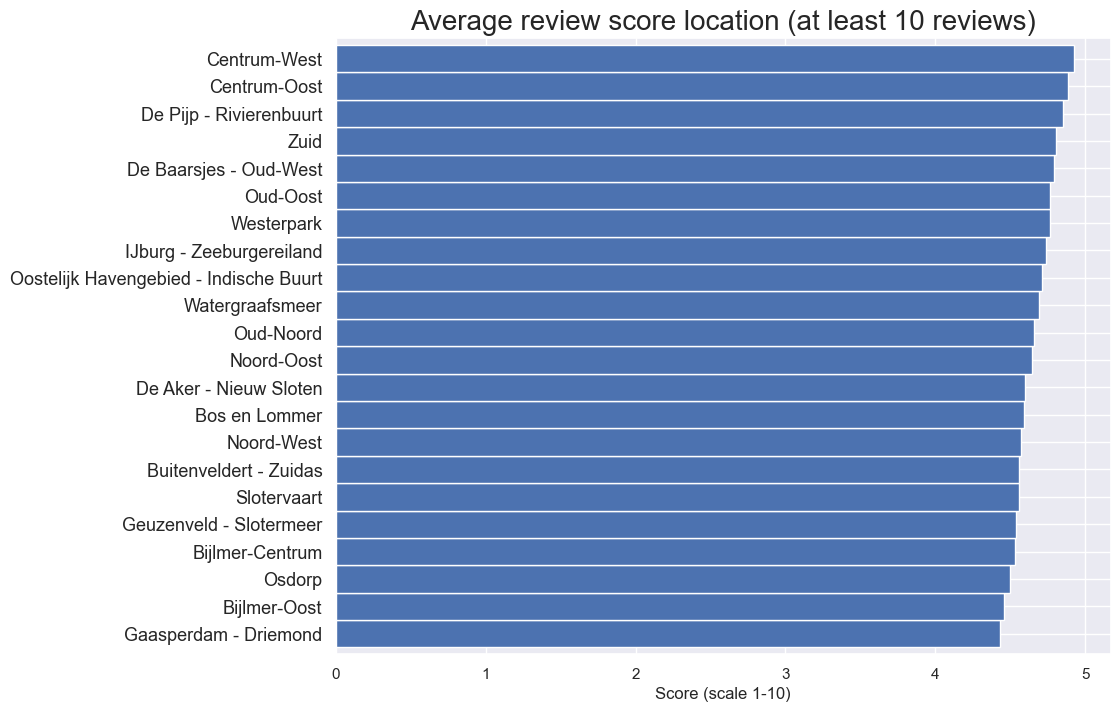

In [27]:
avg_reviews.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=12)
plt.ylabel("")
plt.show()

# Exploring Superhost Status

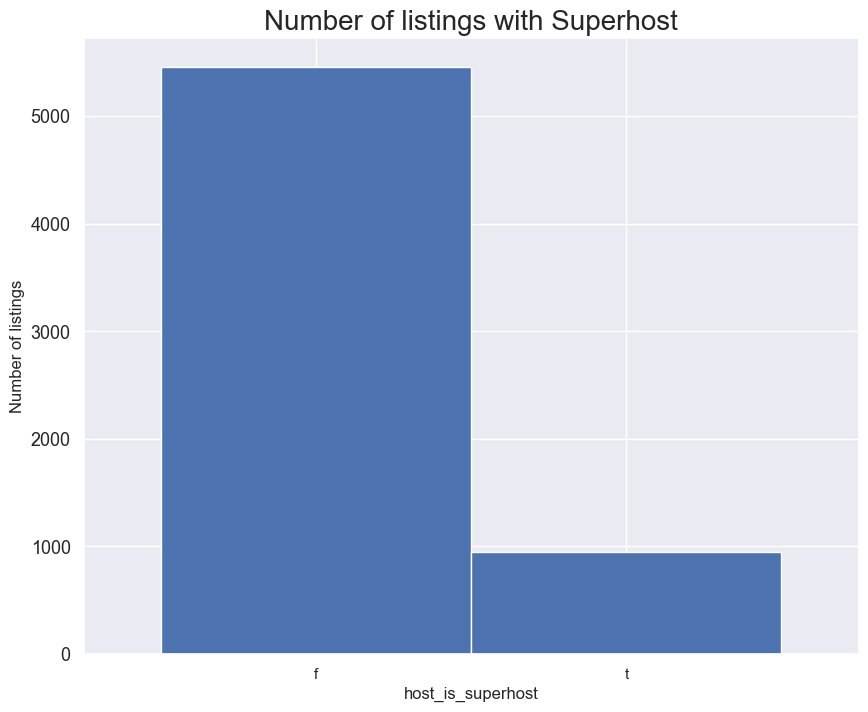

In [28]:
feq=df_cleaned['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

# Booking Considerations based on Host Responses and Reviews

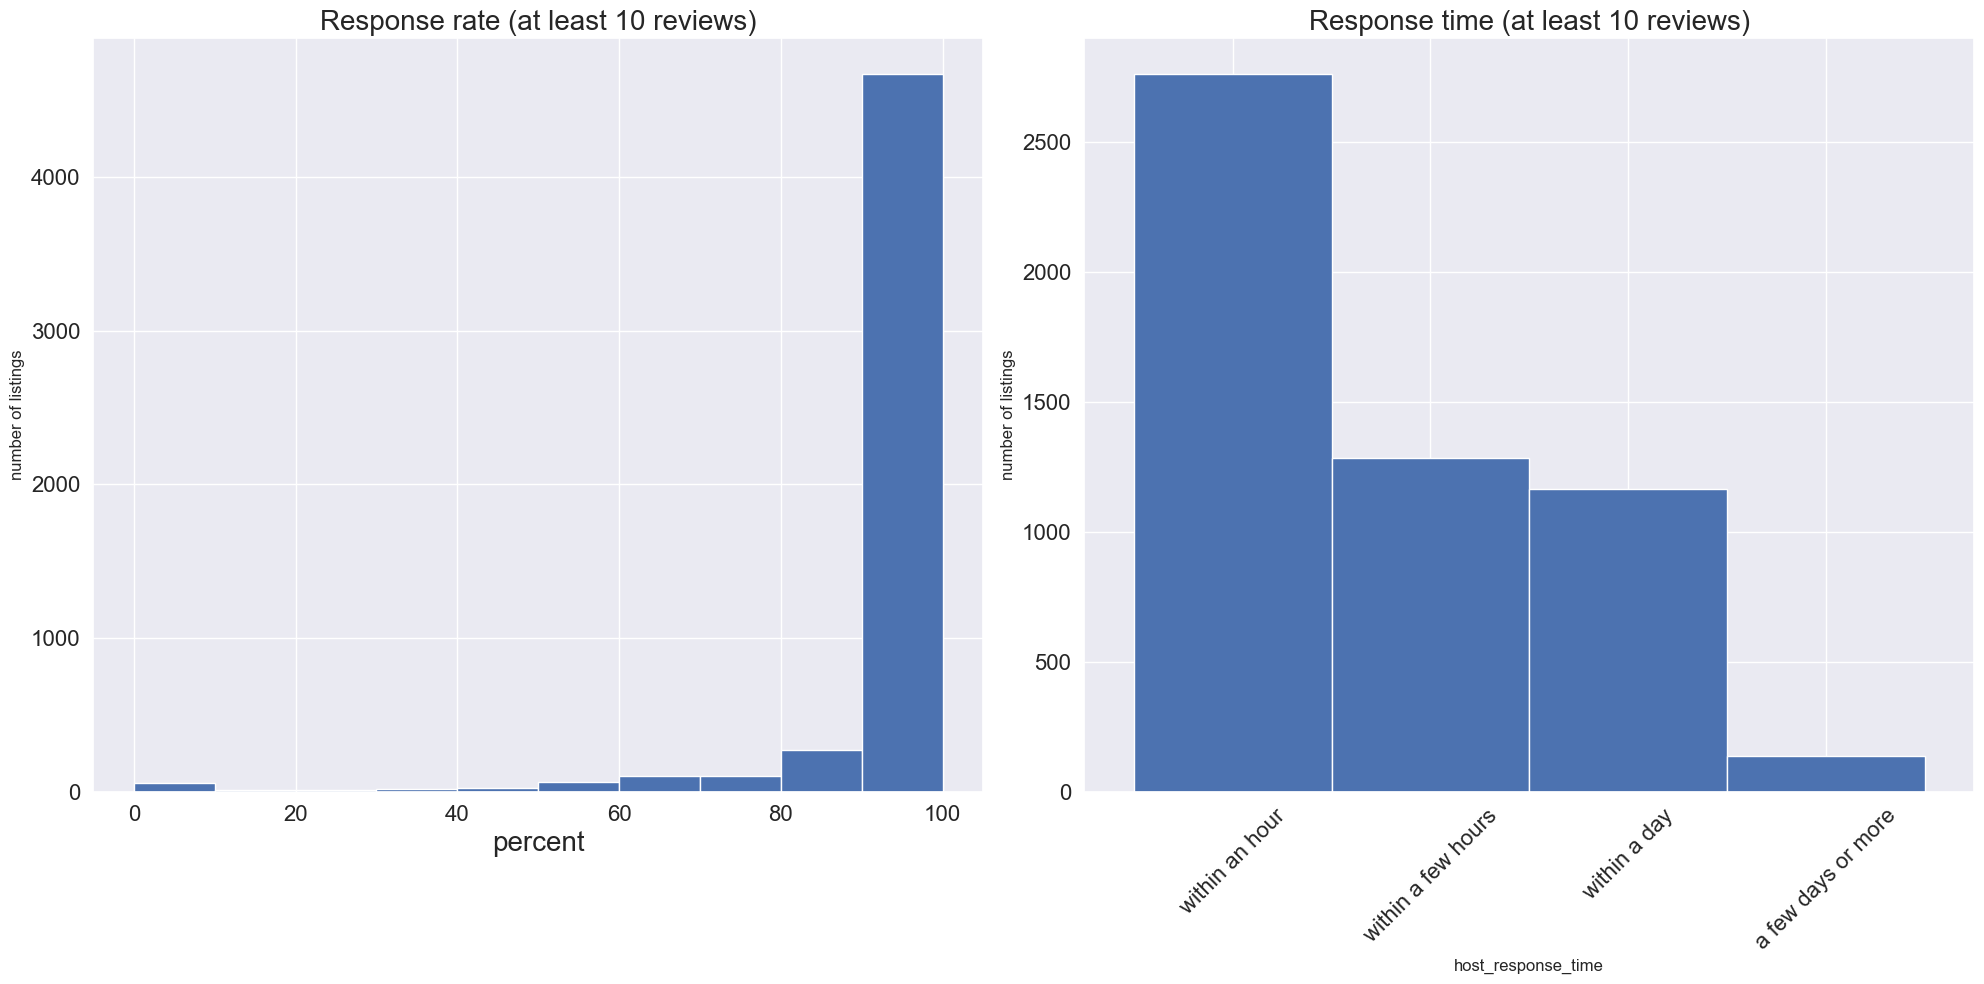

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

feq1 = df_cleaned['host_response_rate'].dropna()
ax1.hist(feq1)
ax1.set_title("Response rate (at least 10 reviews)", fontsize=20)
ax1.set_ylabel("number of listings")
ax1.set_xlabel("percent", fontsize=20)
ax1.tick_params(labelsize=16)

feq2 = df_cleaned['host_response_time'].value_counts()
feq2.plot.bar(ax=ax2, color='b', width=1, rot=45)
ax2.set_title("Response time (at least 10 reviews)", fontsize=20)
ax2.set_ylabel("number of listings")
ax2.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


# Availability over time

In [30]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar

date available  price adjusted_price  minimum_nights  \
listing_id                                                              
2818       2023-06-05         f   69.0         $69.00             3.0   
2818       2023-06-06         f   69.0         $69.00             3.0   
2818       2023-06-07         f   69.0         $69.00             3.0   
2818       2023-06-08         f   69.0         $69.00             3.0   
2818       2023-06-09         f   69.0         $69.00             3.0   
...               ...       ...    ...            ...             ...   
137026     2024-05-31         t  301.0        $301.00             2.0   
137026     2024-06-01         t  301.0        $301.00             2.0   
137026     2024-06-02         t  301.0        $301.00             2.0   
137026     2024-06-03         t  297.0        $297.00             2.0   
137026     2024-06-04         t  297.0        $297.00             2.0   

            maximum_nights  
listing_id                  
2818                1125.0  
2818                1125.0  
2818                1125.0  
2818                1125.0  
2818                1125.0  
...                    ...  
137026              1125.0  
137026              1125.0  
137026              1125.0  
137026              1125.0  
137026              1125.0  

[2776565 rows x 6 columns]

In [31]:
listings_details.index.name = "listing_id"
calendar = pd.merge(calendar, listings_details[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

date available  price adjusted_price  minimum_nights  \
listing_id                                                                      
6830331            2024-02-09         f  190.0        $190.00             7.0   
785432             2023-12-27         f  250.0        $250.00             2.0   
6803270            2023-08-31         f  425.0        $425.00             3.0   
24914093           2024-04-24         f  204.0        $204.00             3.0   
619478604219809197 2023-11-29         f  175.0        $175.00             4.0   
7729814            2023-08-20         f  170.0        $170.00             2.0   
12347938           2024-02-17         f  126.0        $126.00             4.0   
15213109           2023-07-17         f  250.0        $250.00             3.0   
32624963           2023-09-15         t  200.0        $150.00             2.0   
4697911            2023-11-21         f   90.0         $90.00             5.0   
50369122           2023-12-29         f  225.0        $225.00             2.0   
20975003           2023-08-20         f  220.0        $220.00             2.0   
15103827           2024-03-01         f   99.0         $99.00             2.0   
701267863812494783 2023-10-17         f  107.0        $107.00             1.0   
890514891820019143 2023-08-02         t  185.0        $185.00             3.0   

                    maximum_nights  accommodates  
listing_id                                        
6830331                       14.0             3  
785432                      1125.0             4  
6803270                     1125.0             4  
24914093                    1125.0             4  
619478604219809197           365.0             2  
7729814                       60.0             2  
12347938                    1125.0             6  
15213109                    1125.0             4  
32624963                      14.0             1  
4697911                       30.0             4  
50369122                      30.0             2  
20975003                    1125.0             2  
15103827                    1125.0             2  
701267863812494783           365.0             2  
890514891820019143            17.0             2

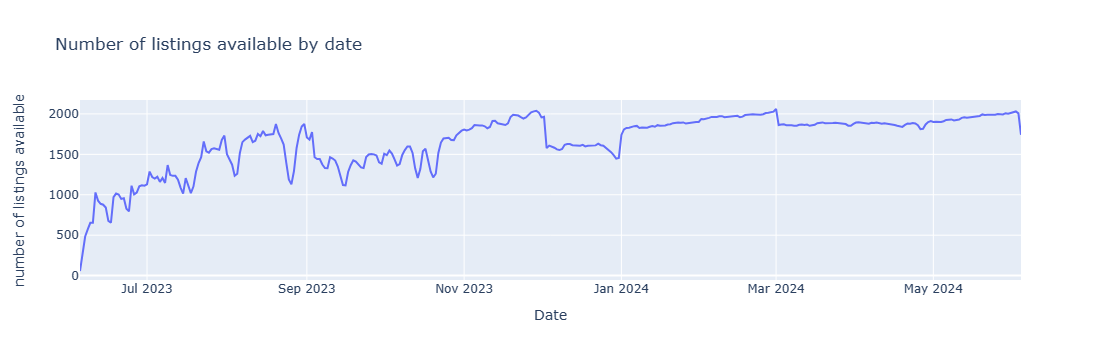

In [32]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

fig = px.line(sum_available, x=sum_available.index, y="available", title='Number of listings available by date',hover_data=["weekday"])
fig.update_layout(xaxis_title='Date',yaxis_title='number of listings available')
fig.update_traces(textposition="bottom right")
pyo.iplot(fig)

# Average price by date

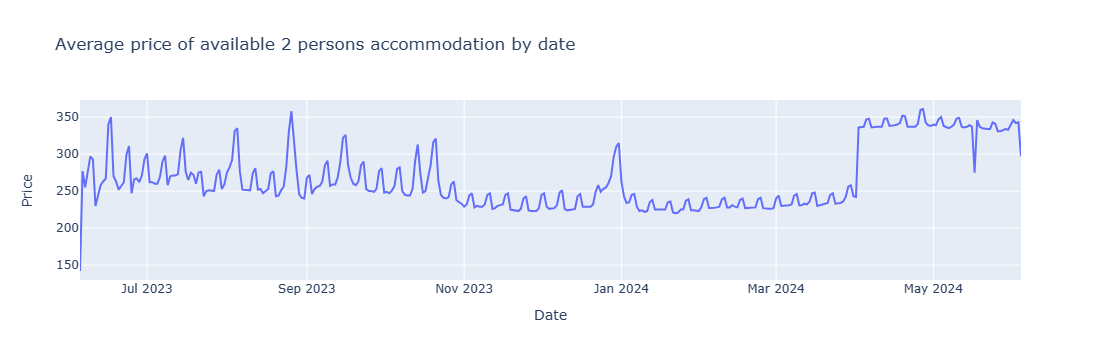

In [33]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby('date')['price'].mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')
fig = px.line(average_price, x=sum_available.index, y="price", title='Average price of available 2 persons accommodation by date',hover_data=["weekday"])
fig.update_layout(xaxis_title='Date',yaxis_title='Price')
fig.update_traces(textposition="bottom right")
pyo.iplot(fig)